In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

%matplotlib inline

# DengAI: Predicting Disease Spread 
## from DrivenData

Feets in the sand, you can hear the waves breaking. The wind resonates in your ears and bring the smell of the vast ocean. A pain is starting to grow behind your eyes. Your brain seems to be pressing against your skull. The dengue symptoms of the dengue fever are taking over your tropical trip.

After I've done two mini-projects on classification, I felt I was ready to do some regression. The goal of this challenge provided by [DrivenData](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/) is to predict the number of cases of dengue fever for two cities: San Juan and Iquitos. This fever is a mosquito-borne disease that occurs in tropical and subtropical parts of the world. The challenge seems perfect to learn about time series and, if I have enough time, domain adaptation. In Latin America, there is as many of nearly half billion cases per year.


<img align="left" src="San_Juan-Puerto_Rico.JPG" width="300" alt="Made with Angular" title="San Juan" hspace="100"/>
<img align="left" src="Iquitos-plaza.jpg" width="350" alt="Made with Bootstrap" title="Iquitos" hspace="100"/>

In [2]:
HTML('<iframe src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d7781641.08369778!2d-69.47224494330946!3d17.76209125155511!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x8c03686fe268196f%3A0xad6b7f0f5c935adc!2sSan+Juan%2C+Puerto+Rico!5e0!3m2!1sen!2sca!4v1503409342798" width="600" height="450" frameborder="0" style="border:0" allowfullscreen></iframe>')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [3]:
HTML('<iframe src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d127400.42574378506!2d-73.35352759499273!3d-3.752745488607723!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x91ea10b0e440c1cb%3A0x9210b8d7040a6692!2sIquitos%2C+Peru!5e0!3m2!1sen!2sca!4v1503409426699" width="600" height="450" frameborder="0" style="border:0" allowfullscreen></iframe>')

In [4]:
!tree

Folder PATH listing
Volume serial number is 0AB0-C170
C:.
ÀÄÄÄ.ipynb_checkpoints


# Data import

In [5]:
# load the provided data
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')

# Seperate data for San Juan
sanJuan_train_features = train_features.loc[train_features['city']=='sj']
sanJuan_train_labels = train_labels.loc[train_labels['city']=='sj']

# Separate data for Iquitos
iquitos_train_features = train_features.loc[train_features['city'] == 'iq']
iquitos_train_labels = train_labels.loc[train_labels['city']=='iq']


print('San Juan')
print('features: ', sanJuan_train_features.shape)
print('labels  : ', sanJuan_train_labels.shape)

print('\nIquitos')
print('features: ', iquitos_train_features.shape)
print('labels  : ', iquitos_train_labels.shape)


San Juan
features:  (936, 24)
labels  :  (936, 4)

Iquitos
features:  (520, 24)
labels  :  (520, 4)


## Data exploration

We will first start by looking at the features. We will see if there is some correlations between them that might be useful to use later. some features that are correlated will be remove will be remove for the first training to give some benchmark. We will then add some features which will be the duplicats of the originals but from an earlier time. This will allow us to use the standard regression algorithms on this data set ever if it is a time serie. Later on, we will merge the label with the features to explore the distribution of the case with respect to time. 

In [6]:
sanJuan_train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


We check if there is missing values in the data set and then fill the missing values

In [7]:
# Null check
pd.isnull(sanJuan_train_features).any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [8]:
sanJuan_train_features.fillna(method='ffill', inplace=True)
iquitos_train_features.fillna(method='ffill', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [9]:
print('San Juan')
print('mean: ', sanJuan_train_labels.mean()[0])
print('var :', sanJuan_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iquitos_train_labels.mean()[0])
print('var :', iquitos_train_labels.var()[0])

San Juan
mean:  1998.826923076923
var : 27.165734265734248

Iquitos
mean:  2005.0
var : 8.516377649325626


We now look at the distribution of total cases.

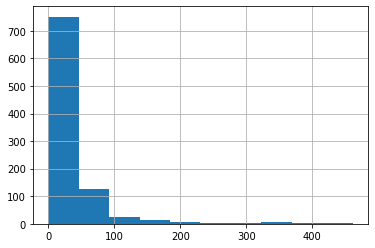

In [10]:
sanJuan_train_labels.total_cases.hist()

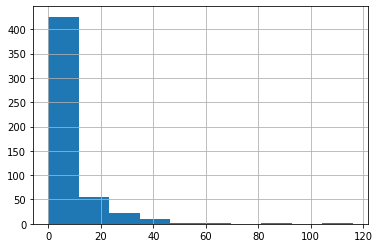

In [11]:
iquitos_train_labels.total_cases.hist()

We now look at the feature "vegetation index" and the target "total_cases" over time. This allows us to see that there is some seasonality in the target function. It is important to notice in that the characteristic time between spikes in the number of cases for San Juan and Iquitos is quite different.

Text(0.5, 0, 'Time')

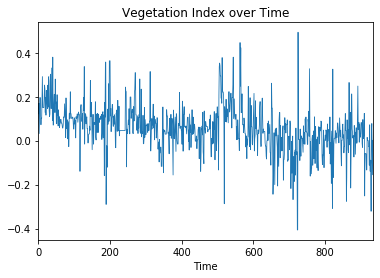

In [12]:
(sanJuan_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [13]:
sanJuan_train_features['total_cases'] = sanJuan_train_labels.total_cases
iquitos_train_features['total_cases'] = iquitos_train_labels.total_cases

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Time')

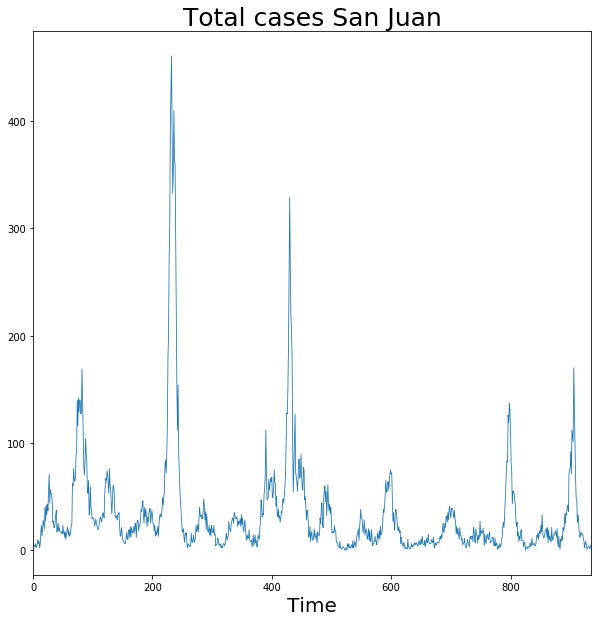

In [14]:
plt.figure(figsize=(10,10))
(sanJuan_train_features
     .total_cases
     .plot
     .line(lw=0.8))
plt.title('Total cases San Juan', fontsize = 25)
plt.xlabel('Time',fontsize = 20)

Text(0.5, 0, 'Time')

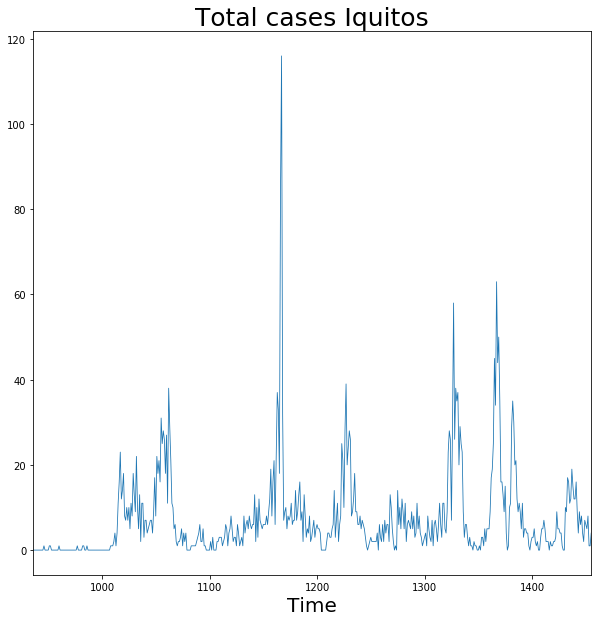

In [15]:
plt.figure(figsize=(10,10))
(iquitos_train_features
     .total_cases
     .plot
     .line(lw=0.8))

plt.title('Total cases Iquitos', fontsize=25)
plt.xlabel('Time', fontsize=20)

### Correlations 

In [16]:
# compute the correlations
sanJuan_correlations = sanJuan_train_features.corr()
iquitos_correlations = iquitos_train_features.corr()

Text(0.5, 1, 'San Juan Variable Correlations')

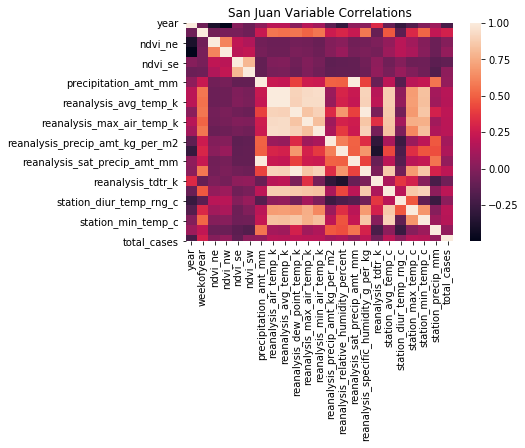

In [17]:
# plot san juan
sanJuan_corr_heat = sns.heatmap(sanJuan_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1, 'Iquitos Variable Correlations')

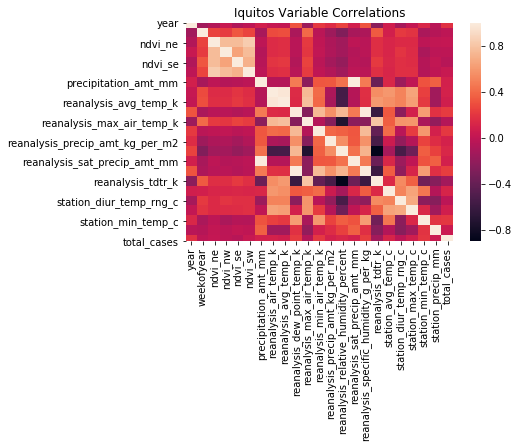

In [18]:
# plot iquitos
iquitos_corr_heat = sns.heatmap(iquitos_correlations)
plt.title('Iquitos Variable Correlations')

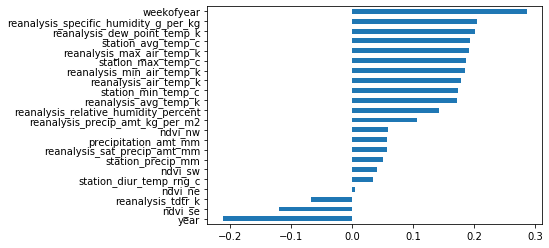

In [19]:
# San Juan
(sanJuan_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values()
     .plot
     .barh())

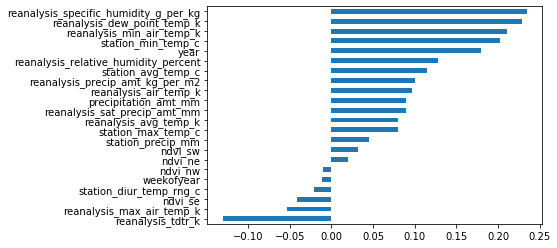

In [20]:
# Iquitos
(iquitos_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values()
     .plot
     .barh())

Finally, we are just checking that the week are followings each other between the train and test set

In [21]:
sanJuan_train_features.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
931,sj,2008,13,2008-03-25,0.07785,-0.039900,0.310471,0.296243,27.19,296.958571,...,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,2008-04-01,-0.03800,-0.016833,0.119371,0.066386,3.82,298.081429,...,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,2008-04-08,-0.15520,-0.052750,0.137757,0.141214,16.96,297.460000,...,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,2008-04-15,0.00180,-0.052750,0.203900,0.209843,0.00,297.630000,...,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3
935,sj,2008,17,2008-04-22,-0.03700,-0.010367,0.077314,0.090586,0.00,298.672857,...,76.960000,0.00,15.671429,3.957143,27.042857,7.514286,31.7,23.3,0.3,5


In [22]:
# load the provided data
test_features = pd.read_csv('dengue_features_test.csv')
test_labels = pd.read_csv('dengue_features_test.csv')

# Seperate data for San Juan
sanJuan_test_features = test_features.loc[test_features['city']=='sj']
sanJuan_test_labels = test_labels.loc[test_labels['city']=='sj']

# Separate data for Iquitos
iq_test_features = test_features.loc[test_features['city'] == 'iq']
iq_test_labels = test_labels.loc[test_labels['city']=='iq']


print('San Juan')
print('features: ', sanJuan_test_features.shape)
print('labels  : ', sanJuan_test_labels.shape)

print('\nIquitos')
print('features: ', iq_test_features.shape)
print('labels  : ', iq_test_labels.shape)

San Juan
features:  (260, 24)
labels  :  (260, 24)

Iquitos
features:  (156, 24)
labels  :  (156, 24)


In [23]:
test_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
